In [1]:
%matplotlib inline

In [2]:
from praclib import *
from value import Value
from plotter import Plotter

In [3]:
tab = read_from_file("tables/201_txt.dat", ",")

In [4]:
time = np.array([Value(const=i) for i in tab[::,0]])
p1 = np.array([Value(const=i) for i in tab[::,1]])
p2 = np.array([Value(const=i) for i in tab[::,2]])

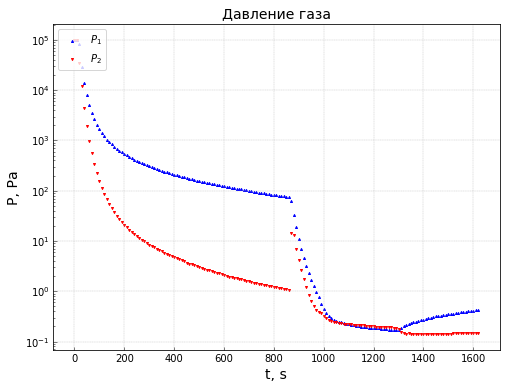

In [5]:
from sympy import *
Plotter.PLT_YSCALE = Plotter.Scale.LOG
Plotter(draw_legend=True).set_name("201pressure").set_title("Давление газа").set_x_name("t, s").set_y_name("P, Pa").\
        add_line(Plotter.get_new_line(x_value=time, y_value=p1,
                                      draw_error=False, legend='$P_1$', fit=False, color='blue', marker='^')).\
        add_line(Plotter.get_new_line(x_value=time, y_value=p2,
                                      draw_error=False, legend='$P_2$', fit=False, color='red', marker='v')).plot(show=True, save=True)

In [6]:
V = Value(const=6.95 / 1000)
p1_der = (p1[2::] - p1[0:-2:]) / (time[2::] - time[0:-2:])
I = p1_der * (-V)

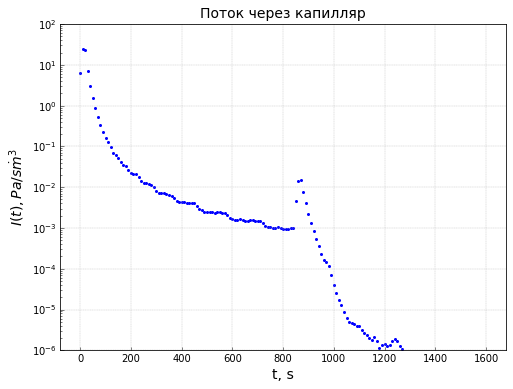

In [7]:
Plotter(draw_legend=False).set_name("201I").set_title("Поток через капилляр").set_x_name("t, s").set_y_name("$I(t),Pa/s\\dot m^3$").\
        add_line(Plotter.get_new_line(x_value=time[:-2:], y_value=I,
                                      draw_error=False, legend='$P_1$', fit=False, color='blue', marker='o')).\
        plot(show=True, save=True, ylim=(10**-6, 100))

In [8]:
from math import pi
pival = Value(const=pi)
l = Value(const=0.2)
r = Value(const=0.9 * 10**-3)
eta = ((p1*p1 - p2*p2))[1:-1:] / (I * Value(const=16)) * pival * (r ** Value(const=4)) / l 

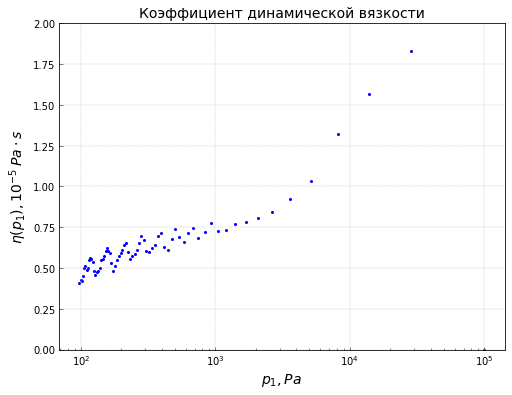

In [9]:
#for i in range(len(p1)):
#    print(i, p1[i].get_value_error())
Plotter.PLT_YSCALE = Plotter.Scale.LINEAR
Plotter.PLT_XSCALE = Plotter.Scale.LOG
Plotter(draw_legend=False).set_name("201eta").set_title("Коэффициент динамической вязкости").set_x_name("$p_1, Pa$").set_y_name("$\eta(p_1), 10^{-5} \\:Pa \\cdot s$").\
        add_line(Plotter.get_new_line(x_value=p1[1:72:], y_value=eta[:71:] * Value(const=10**5),
                                      draw_error=False, legend='$P_1$', fit=False, color='blue', marker='o')).\
        plot(show=True, save=True, ylim=(0, 0.000020 * 10**5))

In [10]:
T = Value(const=298)
mu = Value(const=0.029)
R = Value(const=8.31)
V = Value(const=6.95 / 1000)
Sp = (Value(const=8) * R * T / (pival * mu)).use_func(sqrt)
lamb1 = (eta * Value(const=3) * R * T / Sp) / (p1[1:-1:] * mu)
lamb2 = (eta * Value(const=3) * R * T / Sp) / (p1[1:-1:] * mu)
lamb_teor1 = p1 ** Value(const=-1) * Value(const=6.2 * 10**-3)
lamb_teor2 = p2 ** Value(const=-1) * Value(const=6.2 * 10**-3)

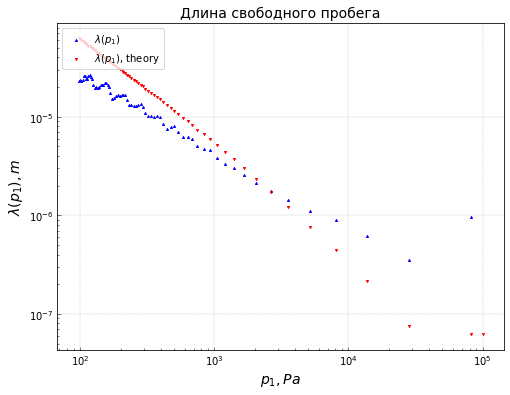

In [11]:
Plotter.PLT_YSCALE = Plotter.Scale.LOG
Plotter.PLT_XSCALE = Plotter.Scale.LOG
Plotter(draw_legend=True).set_name("201lambd1log").set_title("Длина свободного пробега").set_x_name("$p_1, Pa$").set_y_name("$\\lambda(p_1), m$").\
        add_line(Plotter.get_new_line(x_value=p1[1:72:], y_value=lamb1[:71:],
                                      draw_error=False, legend='$\\lambda(p_1)$', fit=False, color='blue', marker='^')).\
        add_line(Plotter.get_new_line(x_value=p1[1:72:], y_value=lamb_teor1[:71:],
                                      draw_error=False, legend='$\\lambda(p_1)$, theory', fit=False, color='red', marker='v')).\
        plot(show=True, save=True)

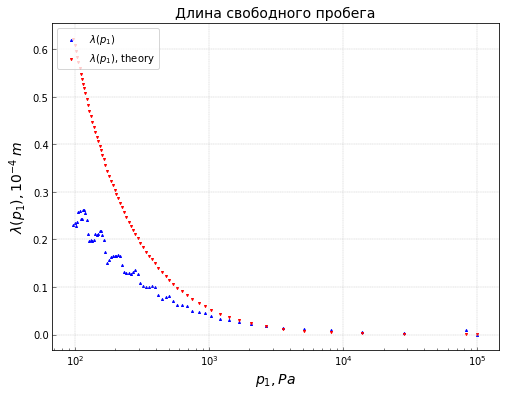

In [12]:
Plotter.PLT_YSCALE = Plotter.Scale.LINEAR
Plotter.PLT_XSCALE = Plotter.Scale.LOG
Plotter(draw_legend=True).set_name("201lambd1lin").set_title("Длина свободного пробега").set_x_name("$p_1, Pa$").set_y_name("$\\lambda(p_1), 10^{-4} \\:m$").\
        add_line(Plotter.get_new_line(x_value=p1[1:72:], y_value=lamb1[:71:] * Value(const=10**4),
                                      draw_error=False, legend='$\\lambda(p_1)$', fit=False, color='blue', marker='^')).\
        add_line(Plotter.get_new_line(x_value=p1[1:72:], y_value=lamb_teor1[:71:] * Value(const=10**4),
                                      draw_error=False, legend='$\\lambda(p_1)$, theory', fit=False, color='red', marker='v')).\
        plot(show=True, save=True)

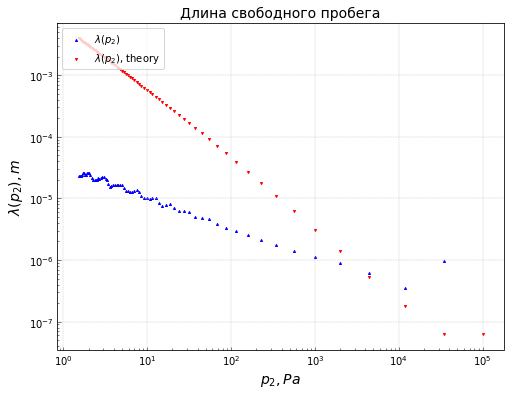

In [13]:
Plotter.PLT_YSCALE = Plotter.Scale.LOG
Plotter.PLT_XSCALE = Plotter.Scale.LOG
Plotter(draw_legend=True).set_name("201lambd2log").set_title("Длина свободного пробега").set_x_name("$p_2, Pa$").set_y_name("$\\lambda(p_2), m$").\
        add_line(Plotter.get_new_line(x_value=p2[1:72:], y_value=lamb2[:71:],
                                      draw_error=False, legend='$\\lambda(p_2)$', fit=False, color='blue', marker='^')).\
        add_line(Plotter.get_new_line(x_value=p2[1:72:], y_value=lamb_teor2[:71:],
                                      draw_error=False, legend='$\\lambda(p_2)$, theory', fit=False, color='red', marker='v')).\
        plot(show=True, save=True)

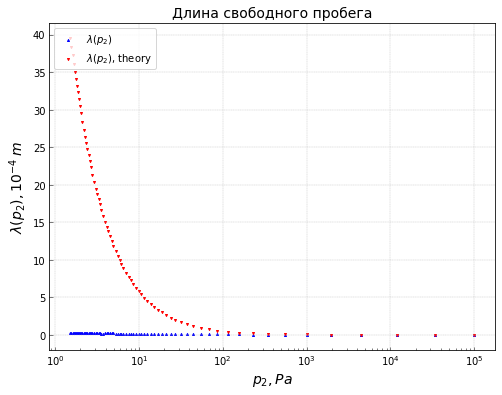

In [14]:
Plotter.PLT_YSCALE = Plotter.Scale.LINEAR
Plotter.PLT_XSCALE = Plotter.Scale.LOG
Plotter(draw_legend=True).set_name("201lambd2lin").set_title("Длина свободного пробега").set_x_name("$p_2, Pa$").set_y_name("$\\lambda(p_2), 10^{-4} \\:m$").\
        add_line(Plotter.get_new_line(x_value=p2[1:72:], y_value=lamb2[:71:] * Value(const=10**4),
                                      draw_error=False, legend='$\\lambda(p_2)$', fit=False, color='blue', marker='^')).\
        add_line(Plotter.get_new_line(x_value=p2[1:72:], y_value=lamb_teor2[:71:] * Value(const=10**4),
                                      draw_error=False, legend='$\\lambda(p_2)$, theory', fit=False, color='red', marker='v')).\
        plot(show=True, save=True)

In [ ]:
p2_der = (p2[2::] - p2[0:-2:]) / (time[2::] - time[0:-2:])
I2 = p2_der * (-V)
S = I2 / p2[1:-1:]
nv0 = (S[0] + S[1]) / Value(const=2)
pmin = p2[-1]
print(nv0.get_value_error(), pmin.get_value_error())
gamma = 7 / 5
pmindp = p2 ** Value(const=-1) * pmin
pmindpgamma = pmindp ** Value(const=1/(2 * gamma))
Steor = (-pmindpgamma + Value(const=1)) * nv0

(Decimal('0.00055753490498188407360757867792244724114425480365753173828125'), Decimal('0')) (Decimal('0.149199999999999999289457264239899814128875732421875'), Decimal('0'))


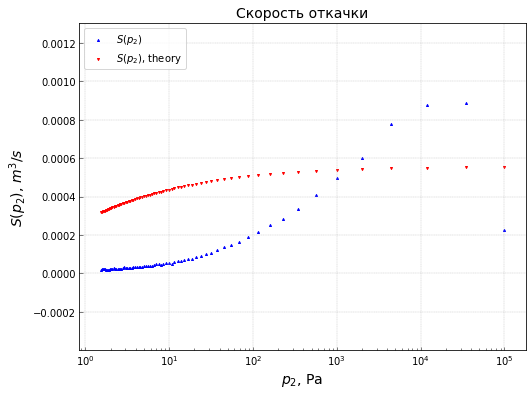

In [16]:
Plotter.PLT_YSCALE = Plotter.Scale.LINEAR
Plotter.PLT_XSCALE = Plotter.Scale.LOG
Plotter(draw_legend=True).set_name("201otcach").set_title("Скорость откачки").set_x_name("$p_2$, Pa").set_y_name("$S(p_2)$, $m^3/s$").\
        add_line(Plotter.get_new_line(x_value=p2[1:72:], y_value=S[:71:],
                                      draw_error=False, legend='$S(p_2)$', fit=False, color='blue', marker='^')).\
        add_line(Plotter.get_new_line(x_value=p2[1:72:], y_value=Steor[:71:],
                                      draw_error=False, legend='$S(p_2)$, theory', fit=False, color='red', marker='v')).plot(show=True, save=True)

Division by zero but
A = 0.0007101888341543017
B = -0.7186339901477827


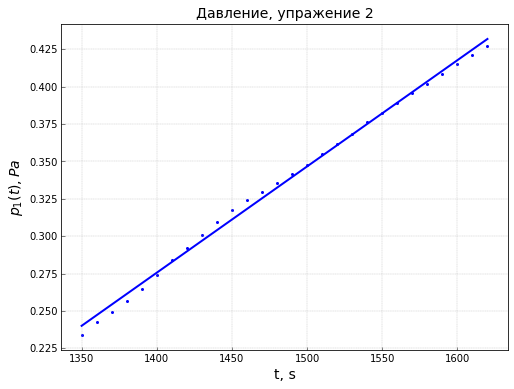

In [17]:
# start from 135 index
Plotter.PLT_YSCALE = Plotter.Scale.LINEAR
Plotter.PLT_XSCALE = Plotter.Scale.LINEAR
Plotter(draw_legend=False).set_name("201task2").set_title("Давление, упражение 2").set_x_name("t, s").set_y_name("$p_1(t),Pa$").\
        add_line(Plotter.get_new_line(x_value=time[135::], y_value=p1[135::],
                                      draw_error=False, legend='$P_1$', fit=True, color='blue', marker='o')).\
        plot(show=True, save=True)